<a href="https://colab.research.google.com/github/the-redback/ml-getting-started/blob/master/ML_Celsius_to_Fahrenhei.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # Use the %tensorflow_version magic if in colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf


import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

TensorFlow 2.x selected.


In [2]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


In [3]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])
model = tf.keras.Sequential([l0])

model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=True)
print("Finished training the model")

Train on 7 samples
Epoch 1/500
7/7 [==============================] - 1s 137ms/sample - loss: 2728.1794
Epoch 2/500
7/7 [==============================] - 0s 444us/sample - loss: 2528.2925
Epoch 3/500
7/7 [==============================] - 0s 287us/sample - loss: 2340.1526
Epoch 4/500
7/7 [==============================] - 0s 1ms/sample - loss: 2163.9380
Epoch 5/500
7/7 [==============================] - 0s 626us/sample - loss: 1999.7858
Epoch 6/500
7/7 [==============================] - 0s 440us/sample - loss: 1847.7787
Epoch 7/500
7/7 [==============================] - 0s 476us/sample - loss: 1707.9436
Epoch 8/500
7/7 [==============================] - 0s 461us/sample - loss: 1580.2452
Epoch 9/500
7/7 [==============================] - 0s 440us/sample - loss: 1464.5763
Epoch 10/500
7/7 [==============================] - 0s 435us/sample - loss: 1360.7539
Epoch 11/500
7/7 [==============================] - 0s 441us/sample - loss: 1268.5138
Epoch 12/500
7/7 [============================

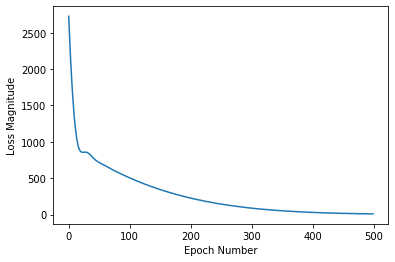

In [4]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [6]:
# Prediction
print(model.predict([100.0]))
print("These are the layer variables: {}".format(l0.get_weights()))

[[211.32512]]
These are the layer variables: [array([[1.8223662]], dtype=float32), array([29.088497], dtype=float32)]


# A little experiment

what if we created more Dense layers with different units, which therefore also has more variables?

In [8]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=True)
print("Finished training the model")

Train on 7 samples
Epoch 1/500
7/7 [==============================] - 0s 43ms/sample - loss: 5299.8853
Epoch 2/500
7/7 [==============================] - 0s 563us/sample - loss: 2516.6907
Epoch 3/500
7/7 [==============================] - 0s 427us/sample - loss: 1283.2914
Epoch 4/500
7/7 [==============================] - 0s 372us/sample - loss: 878.0678
Epoch 5/500
7/7 [==============================] - 0s 377us/sample - loss: 1050.3713
Epoch 6/500
7/7 [==============================] - 0s 332us/sample - loss: 1259.5897
Epoch 7/500
7/7 [==============================] - 0s 387us/sample - loss: 1148.2726
Epoch 8/500
7/7 [==============================] - 0s 330us/sample - loss: 896.3705
Epoch 9/500
7/7 [==============================] - 0s 319us/sample - loss: 740.5966
Epoch 10/500
7/7 [==============================] - 0s 336us/sample - loss: 749.2364
Epoch 11/500
7/7 [==============================] - 0s 568us/sample - loss: 835.7358
Epoch 12/500
7/7 [==============================] 

[[211.74745]]
Model predicts that 100 degrees Celsius is: [[211.74745]] degrees Fahrenheit
These are the l0 variables: [array([[ 0.0712037 , -0.09857479,  0.43243378,  0.869299  ]],
      dtype=float32), array([ 2.2265105,  2.1711588, -2.494279 ,  3.274823 ], dtype=float32)]
These are the l1 variables: [array([[-1.7156683 , -0.20499614, -0.11502559,  0.7569274 ],
       [ 0.16916554, -0.7012792 ,  0.51505315, -0.05478862],
       [-0.07810644,  0.8631827 , -0.8691249 ,  0.12923016],
       [-0.05413029, -1.2576627 ,  1.1114867 , -1.1352936 ]],
      dtype=float32), array([-3.0296285, -3.0763142,  3.177668 , -2.552157 ], dtype=float32)]
These are the l2 variables: [array([[-0.6605894 ],
       [-1.1104995 ],
       [ 0.9748398 ],
       [-0.45401227]], dtype=float32), array([3.221693], dtype=float32)]


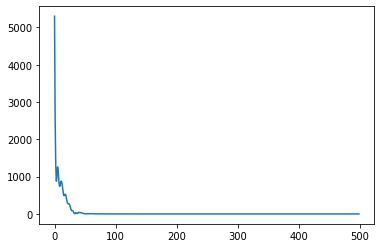

In [9]:
plt.plot(history.history['loss'])
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))